In [1]:

####################################################################################################
####################################################################################################

import sys
import os.path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from IPython.display import display



In [9]:

####################################################################################################
####################################################################################################

input_dir  = "../../pax_merge/merged/apr30/"
input_file = 'merged_all_200000.pkl'
input_path = input_dir + input_file
dir_in     = '../../pax_merge/merged/apr30/waveforms_s2waveforms_test_v2/new'


####################################################################################################
####################################################################################################

df = pd.read_pickle(input_path)
df = df[df['intr_count'] == 1].reset_index(drop=True)
df = df[100000:][:]

nEvents = len(df.index)

print(nEvents)
#display(df[0:5][:])


####################################################################################################
####################################################################################################

x_true = df[:]['x'].as_matrix()
y_true = df[:]['y'].as_matrix()

x_tpf  = df[:]['intr_x'].as_matrix()
y_tpf  = df[:]['intr_y'].as_matrix()

x_nn   = df[:]['intr_x_nn'].as_matrix()
y_nn   = df[:]['intr_y_nn'].as_matrix()

dx_tpf = x_true - x_tpf
dy_tpf = y_true - y_tpf

dx_nn  = x_true - x_nn
dy_nn  = y_true - y_nn


####################################################################################################
# dR
####################################################################################################

dr_tpf = np.sqrt( np.square(dx_tpf) + np.square(dy_tpf) )
dr_nn  = np.sqrt( np.square(dx_nn)  + np.square(dy_nn)  )

dr_std_tpf = np.std(dr_tpf)
dr_std_nn  = np.std(dr_nn)

dr_mean_tpf = np.mean(dr_tpf)
dr_mean_nn  = np.mean(dr_nn)

dr_nbins = 7*10*2
dr_range = [-3, 3]
dr_max   = 7

dr_label_tpf = '%5s ($\mu$ = %.02f, $\sigma$ = %.02f)' % ( 'TPF: $\Delta$D ', dr_std_tpf, dr_mean_tpf)
dr_label_nn  = '%5s ($\mu$ = %.02f, $\sigma$ = %.02f)' % ( 'NN:  $\Delta$D ', dr_std_nn , dr_mean_nn )


####################################################################################################
# Overflow & Underflow
####################################################################################################

dr_tpf = np.clip(dr_tpf, 0, dr_max)
dr_nn  = np.clip(dr_nn , 0, dr_max)


20967


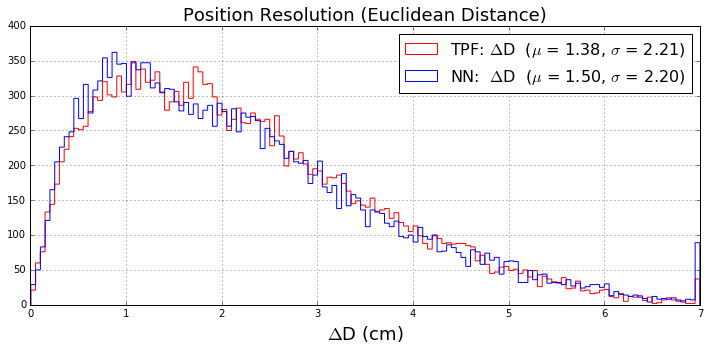

In [11]:

####################################################################################################
####################################################################################################

w, h = 12, 5
f = plt.figure(figsize=(w, h))
plt.title('Position Resolution (Euclidean Distance)', fontsize=18)

# TPF
plt.hist(dr_tpf, bins=dr_nbins, histtype='step', color='r', label=dr_label_tpf)
plt.ylim([0, 400])
plt.xlabel('$\Delta$R', fontsize=18)
plt.legend(fontsize=16)
plt.grid(True)

# NN
plt.hist(dr_nn, bins=dr_nbins, histtype='step', color='b', label=dr_label_nn)
plt.ylim([0, 400])
plt.xlabel('$\Delta$D (cm)', fontsize=18)
plt.legend(fontsize=16)
plt.grid(True)

f.savefig('plots/resolution_reference.png')

